-------------------------------------------------------
================== 1.Data Selection ===================
-------------------------------------------------------

                 Country                           Region  Happiness Rank  \
0            Switzerland                   Western Europe               1   
1                Iceland                   Western Europe               2   
2                Denmark                   Western Europe               3   
3                 Norway                   Western Europe               4   
4                 Canada                    North America               5   
5                Finland                   Western Europe               6   
6            Netherlands                   Western Europe               7   
7                 Sweden                   Western Europe               8   
8            New Zealand        Australia and New Zealand               9   
9              Australia        Australia and New Zealand    

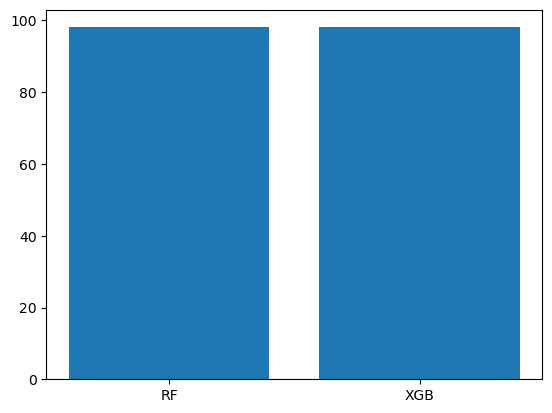

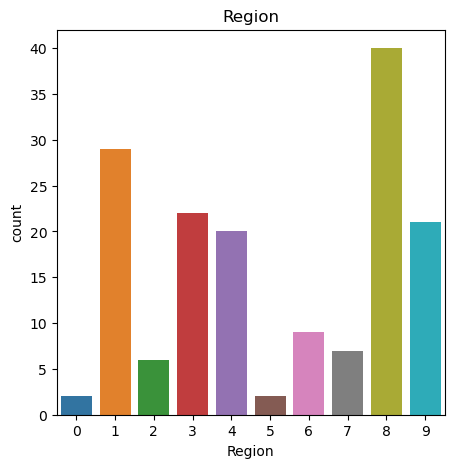

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


#===================== 1. DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("happiness_score_dataset.csv")
print("-------------------------------------------------------")
print("================== 1.Data Selection ===================")
print("-------------------------------------------------------")
print()
print(data_frame.head(20))

#=====================  2.DATA PREPROCESSING ==========================


#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("-------------------------------------------------------------")
print("================ Before Checking missing values =========")
print("-------------------------------------------------------------")
print()
print(data_frame.isnull().sum())

#=== LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("-------------------------------------------------------------")
print("==================== Before label encoding ==================")
print("------------------------------------------- ------------------")
print()
print(data_frame['Country'].head(15))

data_frame['Country']= label_encoder.fit_transform(data_frame['Country'])

data_frame['Region']= label_encoder.fit_transform(data_frame['Region'])

print("-------------------------------------------------------------")
print("==================== After label encoding ==================")
print("-------------------------------------------------------------")
print()
print(data_frame['Country'].head(15))


#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('Happiness Rank',axis=1)
y=data_frame['Happiness Rank']


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's in dataset  : ", data_frame.shape[0])
print()
print("Total No.of training data's   : ", X_train.shape[0])
print()
print("Total No.of testing data's    : ", X_test.shape[0])

#============================  CLASSIFICATION =============================

# === XGBOOST ===

import xgboost as xgb

xgbb=xgb.XGBRegressor()

xgbb.fit(X_train, y_train, eval_metric='auc')
 
y_pred_xg = xgbb.predict(X_test)

error_xgb=metrics.mean_absolute_error(y_test,y_pred_xg)

Accuracy_xgb=100-error_xgb 

print("----------------------------------------")
print("XGBOOST CLASSIFICATION --> XGB")
print("------------------------------------")
print()
print("1. Accuracy  =",Accuracy_xgb,'%' )
print()
print("2. Error Rate =",error_xgb,'%' )
print()


# ==== RANDOM FOREST ===


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)

error_rf=metrics.mean_absolute_error(y_test,y_pred_xg)

Accuracy_rf=100-error_rf 

print("----------------------------------------")
print("RANDOM FOREST --> RF")
print("------------------------------------")
print()
print("1. Accuracy  =",Accuracy_rf,'%' )
print()
print("2. Error Rate =",error_rf,'%' )
print()

# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    print("------------------------------------------------")
    print()
    print([i],"The Happiness Report ",Y_pred[i])
    
# ===== COMPARISON =====

vals=[Accuracy_rf,Accuracy_xgb]
inds=range(len(vals))
labels=["RF","XGB"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()

# === EDA ==

plt.figure(figsize=(5, 5))
plt.title("Region")
sns.countplot(x='Region',data=data_frame)
plt.show()


